In [53]:
import os
os.chdir("/code-online/code/visual_error_correction")
os.environ['CUDA_VISIBLE_DEVICES']="3"

In [54]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

In [55]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

In [58]:
image = cv2.imread('./example_data/box_1.JPG')
image = cv2.resize(image, (800, 800))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

cv2.imwrite("./example_data/box_2.JPG", cv2.cvtColor(image, cv2.COLOR_RGB2BGR))

True

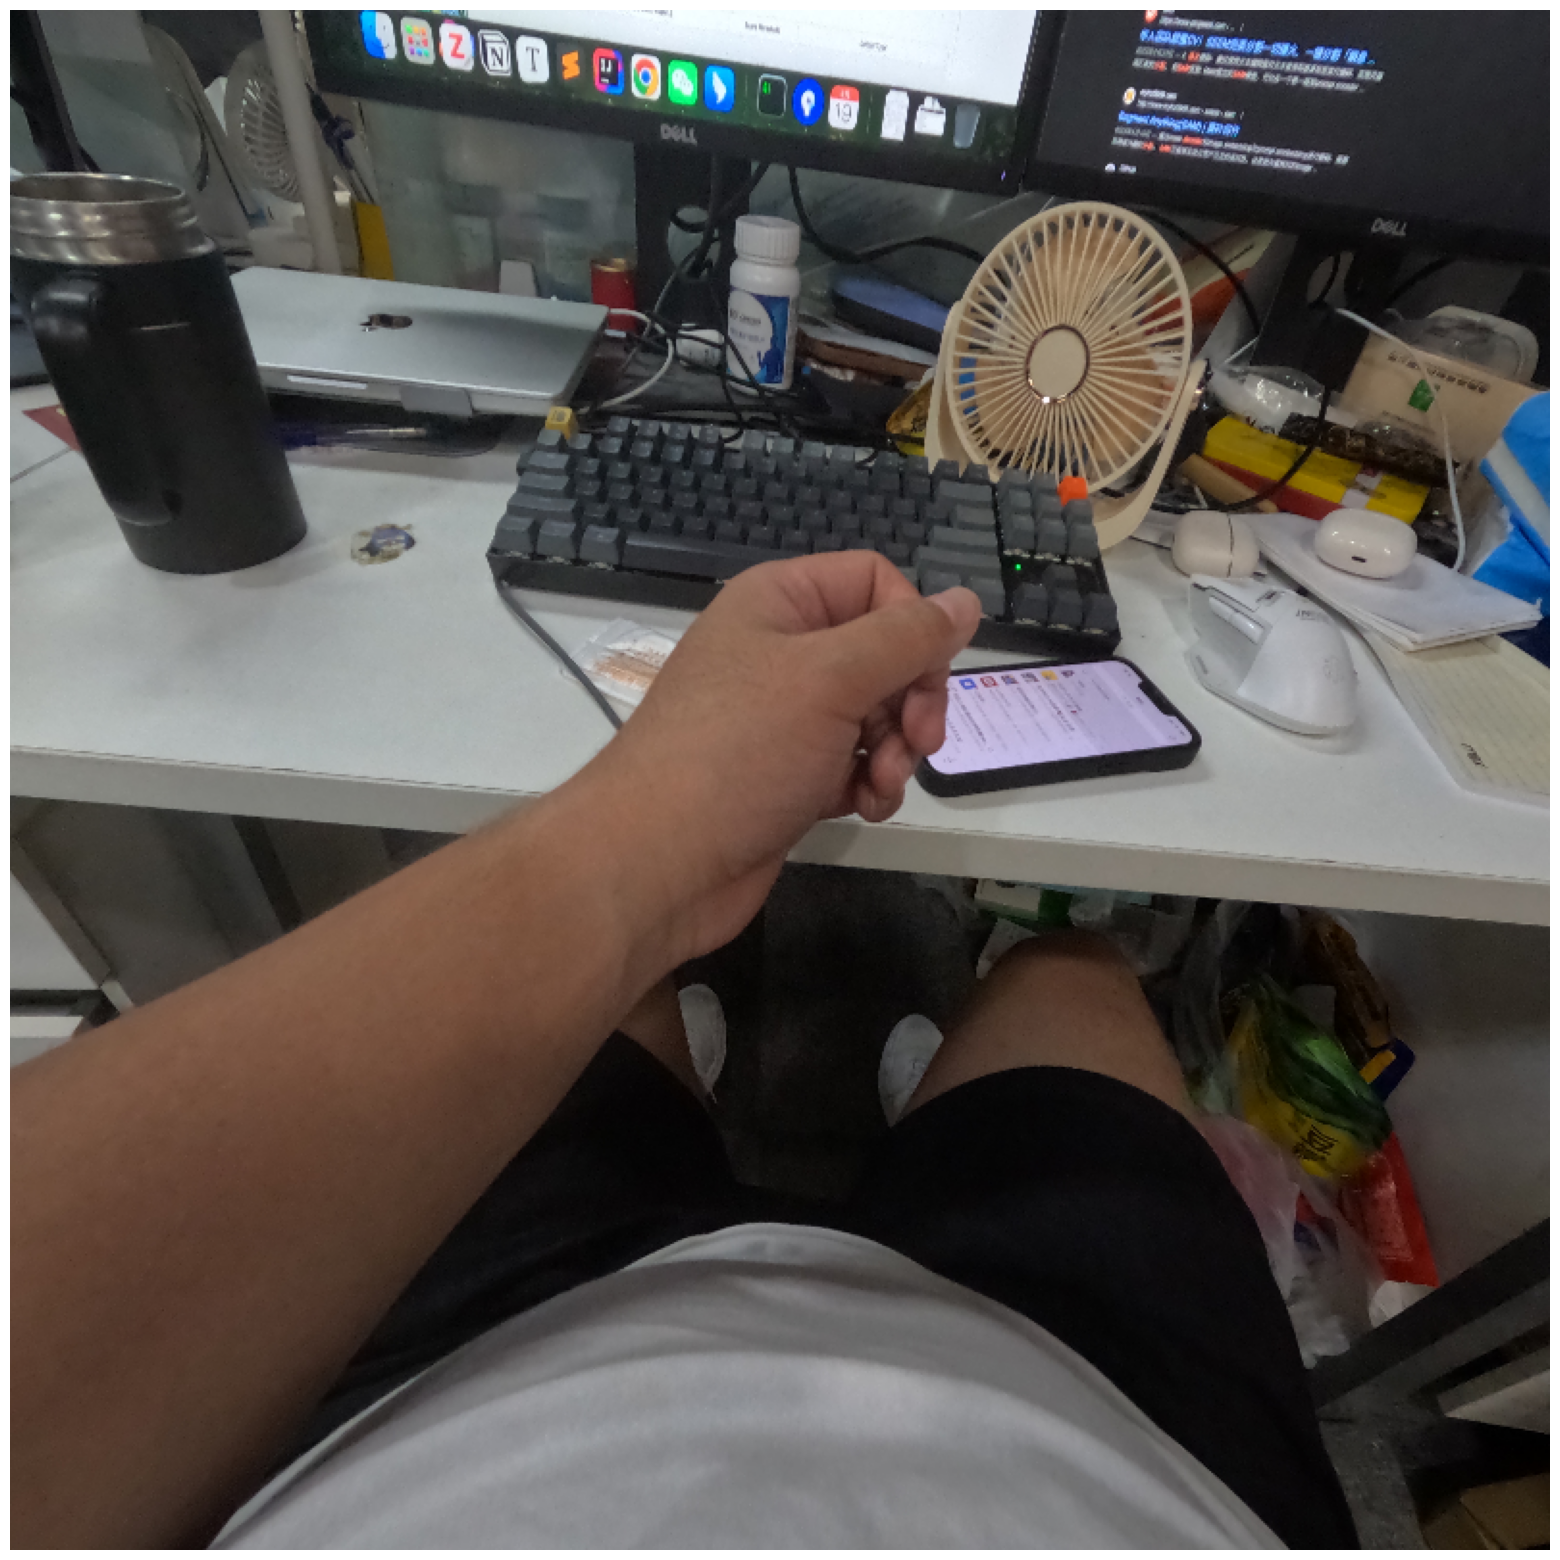

In [45]:
plt.figure(figsize=(20,20))
plt.imshow(image)
plt.axis('off')
plt.show()

In [46]:

from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam_checkpoint = "./checkpoints/sam_anything/sam_vit_l_0b3195.pth"
model_type = "vit_l"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)

In [47]:
masks = mask_generator.generate(image)

In [48]:
print(len(masks))
print(masks[0].keys())

186
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


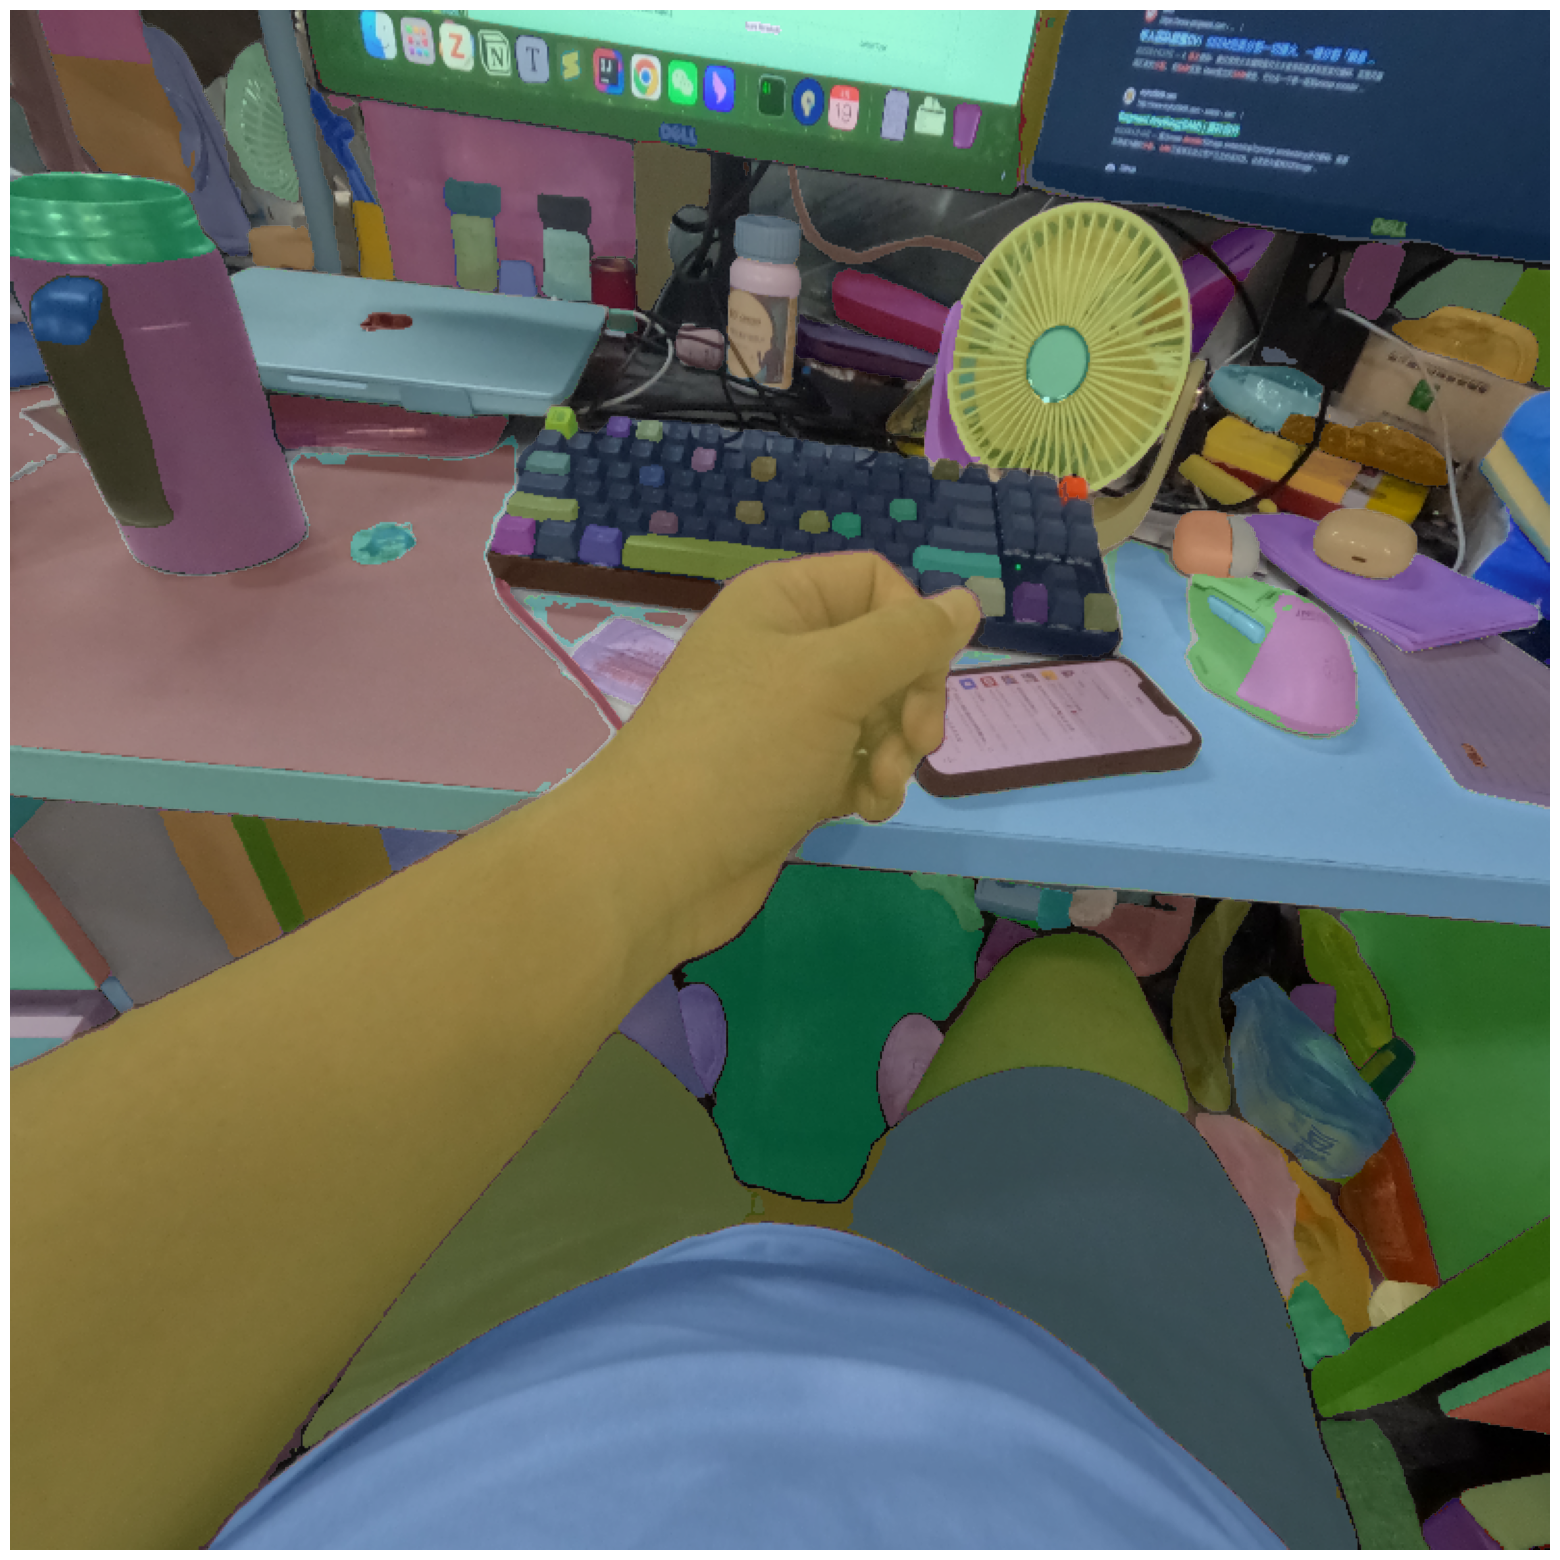

In [49]:
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show() 

In [26]:
mask_generator_2 = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side=32,
    pred_iou_thresh=0.86,
    stability_score_thresh=0.92,
    crop_n_layers=1,
    crop_n_points_downscale_factor=2,
    min_mask_region_area=100,  # Requires open-cv to run post-processing
)

In [27]:
masks2 = mask_generator_2.generate(image)

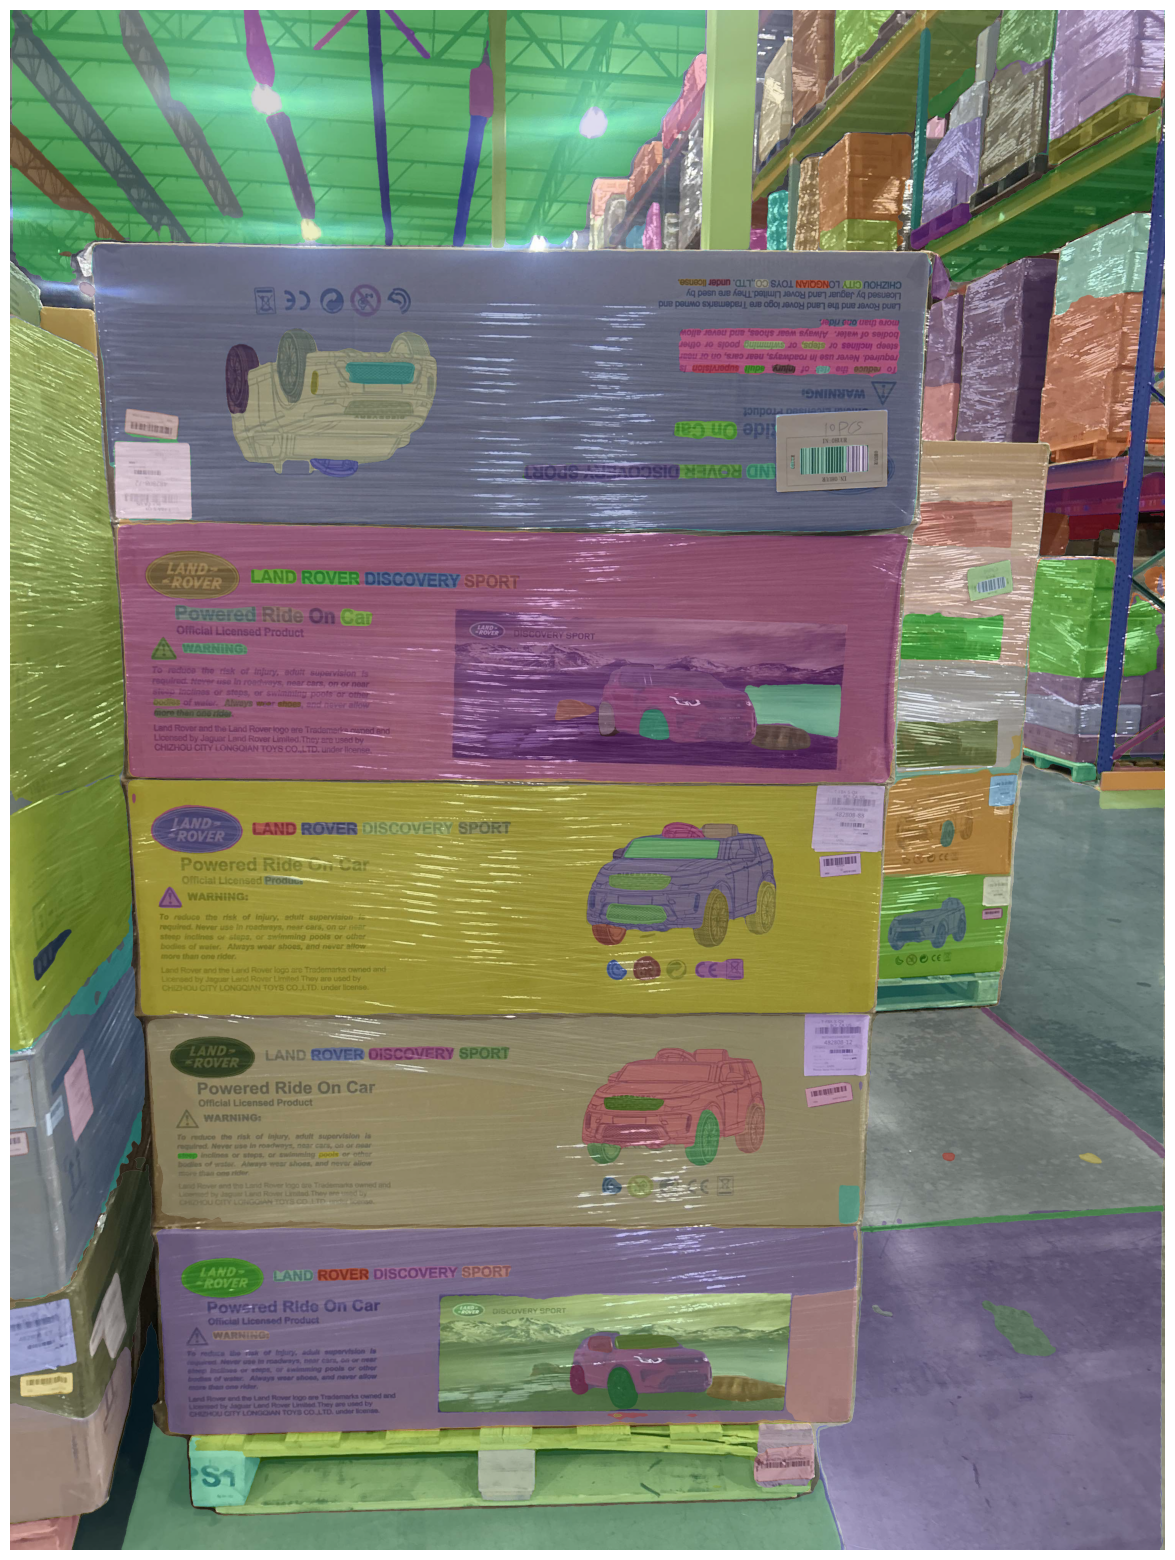

In [28]:
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks2)
plt.axis('off')
plt.show() 